In [ ]:
'''Problem Statemt : An offer to be rolled out to the customers with high score as they would be prominent customers to visit mall. 
No restrictions of offer on gender or age. Offer is general'''

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df=pd.read_csv(r"C:\Python Imarticus\Basics\K Means Clustering\Mall_Customers.csv",index_col=0,header=0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [26]:
print(df.shape)
print()
print(df.info())
print()
print(df.isnull().sum())
print()
df.describe(include='all')

(200, 4)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64



,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [27]:
#Before generating model convert the categorical var into numeric. Here for eg: Gender
#df.Gender=df.Gender.map({"Female":0,"Male":1})
#df.head()

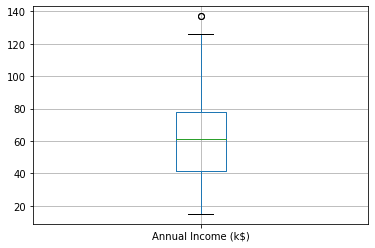

In [44]:
#also check for outliers using boxplot and then go for model building
df.boxplot(column="Annual Income (k$)")
#Here there is one point which is not in range,but this is not so much far from whisker so no need to take any action

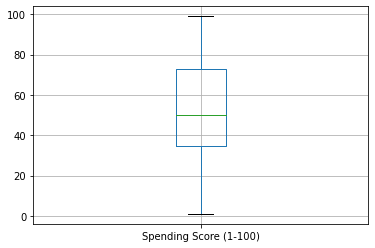

In [45]:
df.boxplot(column="Spending Score (1-100)")

In [28]:
'''subsetting annual income and score from dataset (creating independent vars)
instead of iloc we use values as this creates an array rather than a dataframe.But df takes more time to build model than 
array,as array is light in weight.Also array doesnt have headers as model doesnt need headers

change here to add more colums'''

X=df.values[:,[2,3]]

In [29]:
print(X)

[[15 39]
 [15 81]
 [16 6]
 [16 77]
 [17 40]
 [17 76]
 [18 6]
 [18 94]
 [19 3]
 [19 72]
 [19 14]
 [19 99]
 [20 15]
 [20 77]
 [20 13]
 [20 79]
 [21 35]
 [21 66]
 [23 29]
 [23 98]
 [24 35]
 [24 73]
 [25 5]
 [25 73]
 [28 14]
 [28 82]
 [28 32]
 [28 61]
 [29 31]
 [29 87]
 [30 4]
 [30 73]
 [33 4]
 [33 92]
 [33 14]
 [33 81]
 [34 17]
 [34 73]
 [37 26]
 [37 75]
 [38 35]
 [38 92]
 [39 36]
 [39 61]
 [39 28]
 [39 65]
 [40 55]
 [40 47]
 [40 42]
 [40 42]
 [42 52]
 [42 60]
 [43 54]
 [43 60]
 [43 45]
 [43 41]
 [44 50]
 [44 46]
 [46 51]
 [46 46]
 [46 56]
 [46 55]
 [47 52]
 [47 59]
 [48 51]
 [48 59]
 [48 50]
 [48 48]
 [48 59]
 [48 47]
 [49 55]
 [49 42]
 [50 49]
 [50 56]
 [54 47]
 [54 54]
 [54 53]
 [54 48]
 [54 52]
 [54 42]
 [54 51]
 [54 55]
 [54 41]
 [54 44]
 [54 57]
 [54 46]
 [57 58]
 [57 55]
 [58 60]
 [58 46]
 [59 55]
 [59 41]
 [60 49]
 [60 40]
 [60 42]
 [60 52]
 [60 47]
 [60 50]
 [61 42]
 [61 49]
 [62 41]
 [62 48]
 [62 59]
 [62 55]
 [62 56]
 [62 42]
 [63 50]
 [63 46]
 [63 43]
 [63 48]
 [63 52]
 [63 54

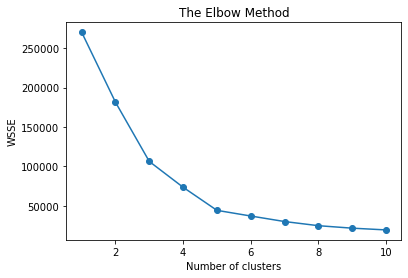

In [30]:
'''Using Elbow method to find optimum number of clusters(k-value)
   wsse:within(the cluster) sum of square error
   n_clusters: k value
   random_state:argument for specifying seed value (to get randomly initial centriods same every time)
   fit(): function for training and building the model  by passing input data
   inertia_: statistical name for wsse, by this we can get  wsse at particular k value
'''


from sklearn.cluster import KMeans

wsse = [] #creating empty list
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    wsse.append(kmeans.inertia_)
plt.plot(range(1, 11), wsse)
plt.scatter(range(1, 11), wsse) #to get scatter point
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSSE')
plt.show()

In [31]:
print(wsse)

[269981.28, 181363.59595959596, 106348.37306211118, 73679.78903948834, 44448.45544793371, 37271.8862365895, 30273.394312070042, 25022.485004530354, 21881.878507060967, 19669.710998301216]


In [32]:
'''After k=5 in the above graph wsse is decreasing gradually. Last elblow point is the optimum value of k,in the above case its 5
   Fitting K- means to the dataset(building final model)
   fit_predict(): for predicting Y(independent) on basis of X(depending)
   Y_pred: conatins final cluster no.s after the number of iterations
'''

kmeans=KMeans(n_clusters=5,random_state=10)
Y_pred=kmeans.fit_predict(X)

In [33]:
Y_pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [34]:
#to check the no. of iterations till the model convergence(stop moving from one cluster to another)
kmeans.n_iter_

5

In [35]:
#concatenate the Y_pred to original df

df["clusters"]=Y_pred
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,3
2,Male,21,15,81,0
3,Female,20,16,6,3
4,Female,23,16,77,0
5,Female,31,17,40,3


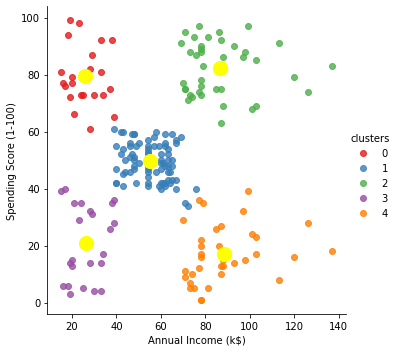

In [36]:
#cluster_centers_ is an attribute once model is built for getting final  centriods. cluster_centers_[:, 0] for x cordinate and 
#cluster_centers_[:, 1] for y cordinate, s is size

sns.lmplot( data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
           fit_reg=False, # No regression line
           hue='clusters',palette="Set1")

#change index here to add correct numeric vars for centriods once we add other vars when model is built
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],s = 200, c = 'yellow')
plt.show()

In [37]:
#cluster centriods

print(kmeans.cluster_centers_[:, 0])
print()
print(kmeans.cluster_centers_[:, 1])

[25.72727273 55.2962963  86.53846154 26.30434783 88.2       ]

[79.36363636 49.51851852 82.12820513 20.91304348 17.11428571]


In [38]:
df["clusters"]=df.clusters.map({0:"Careless",1:"Standard",2:"Target",3:"Sensible",4:"Careful"})


In [39]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
CustomerID,,,,,
1,Male,19,15,39,Sensible
2,Male,21,15,81,Careless
3,Female,20,16,6,Sensible
4,Female,23,16,77,Careless
5,Female,31,17,40,Sensible


In [40]:
#to see the no. of observations in each cluster
df["clusters"].value_counts()

Standard    81
Target      39
Careful     35
Sensible    23
Careless    22
Name: clusters, dtype: int64

In [41]:
new_df=df[df["clusters"]=="Target"]

In [42]:
new_df.shape

(39, 5)

In [46]:
new_df.to_excel(r"C:\Python Imarticus\Basics\Results_Files\TargetCustomers_KmeansClustering.xlsx",index=True)